## Crypto Currency Hype!

### Getting Historical data of cryptocurreny markets with library yfinance:https://pypi.org/project/yfinance/ <br>

### Getting Google search Trends with library pytrends: https://github.com/GeneralMills/pytrends.

### Merge These two data and compare price of these two symobols with their related google search trends.


In [ ]:
! pip install yfinance
! pip install pytrends

## yfinance for eth and btc:

In [1]:
import yfinance as yf 
import datetime

sd = datetime.date(2017, 1, 1)
ed = datetime.date(2021, 1, 1)
btcusd = yf.download(tickers='BTC-USD', start=sd, end=ed, interval="1d")
ethusd = yf.download(tickers='ETH-USD', start=sd, end=ed, interval="1d")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## pytrends for google searches
it retrieves interests for each search keywords over time

In [2]:
import pandas as pd                        
from pytrends.request import TrendReq

pytrends = TrendReq()

pytrends.build_payload(['bitcoin', 'ethereum'], cat=0, timeframe='today 5-y') 
trends = pytrends.interest_over_time() 

## We will merge two data and plot interest and price for each symbol: bitcoin and ethereum to compare them

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

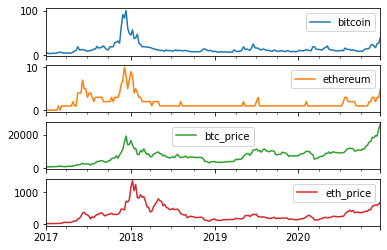

In [3]:
merged = trends.join(btcusd[['Close']].rename(columns={'Close': 'btc_price'}), how='inner').join(ethusd[['Close']].rename(columns={'Close': 'eth_price'}), how='inner')
del merged['isPartial']

merged.plot(subplots=True)


## As we can see there are correlation with the interest in google and price of the symbols. <br>

## Let's plot the correlation. 

In [4]:
import matplotlib.pyplot as plt

merged.corr().style.background_gradient(cmap='coolwarm')

,bitcoin,ethereum,btc_price,eth_price
bitcoin,1.000000,0.806257,0.497602,0.565615
ethereum,0.806257,1.000000,0.349969,0.584710
btc_price,0.497602,0.349969,1.000000,0.607165
eth_price,0.565615,0.584710,0.607165,1.000000


### As we can see there are correlation between search term of a symbol and its price. <br>
### Also there are correlation with price of two symbol. There is a high correlation.

### Let's plot histogra of the return of price of each symbol.
### return of a price means the rate of change in the price in each timestep.

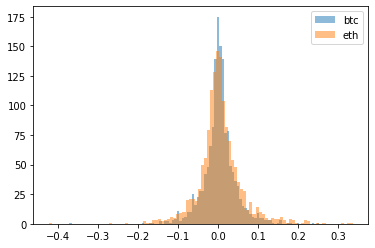

In [5]:
plt.hist(btcusd['Close'].pct_change(), bins=100, alpha=0.5, label='btc');
plt.hist(ethusd['Close'].pct_change(), bins=100, alpha=0.5, label='eth');
plt.legend()

### As we can see the rate of change in two symbol are almost the same. 
### But keep in mind ethereum sometimes has higher rate of change so there is a higher risk here than bitcoin/   

In [6]:
merged.to_csv('crypto.csv')